In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os



Dot_density = 500
# cm = 1/2.54
Figsize=(4,3)
# Figsize=(10,4)
Y_label_font_size = 3
SET_X_LIMIT = True
SET_Y_LIMIT = False
Ylim = (-5, 250)
Xlim = (0,40)
results = [item for item in os.listdir() if 'csv' in item and '$' not in item]


class PlotData():

    def __init__(self, csv_file) -> None:
        self.title, extension = os.path.splitext(os.path.basename(csv_file))
        self.raw_data = pd.read_csv(csv_file, encoding='utf-16',sep='\t')
        _column = self.raw_data.iloc[0]
        self.item_name = [item for item in _column if str(item) != 'nan']

        self.full_data = {}
        self.picked_data = {}

        for n, item in enumerate(self.item_name):
            i = 2*n
            self.full_data[item] = self.raw_data.iloc[2:,i:i+2].dropna(how='all')
            
            step = int(len(self.full_data[item])/Dot_density)
            if step != 0:
                self.picked_data[item] = self.full_data[item].iloc[::step].apply(pd.to_numeric)
            else:
                self.picked_data[item] = self.full_data[item]

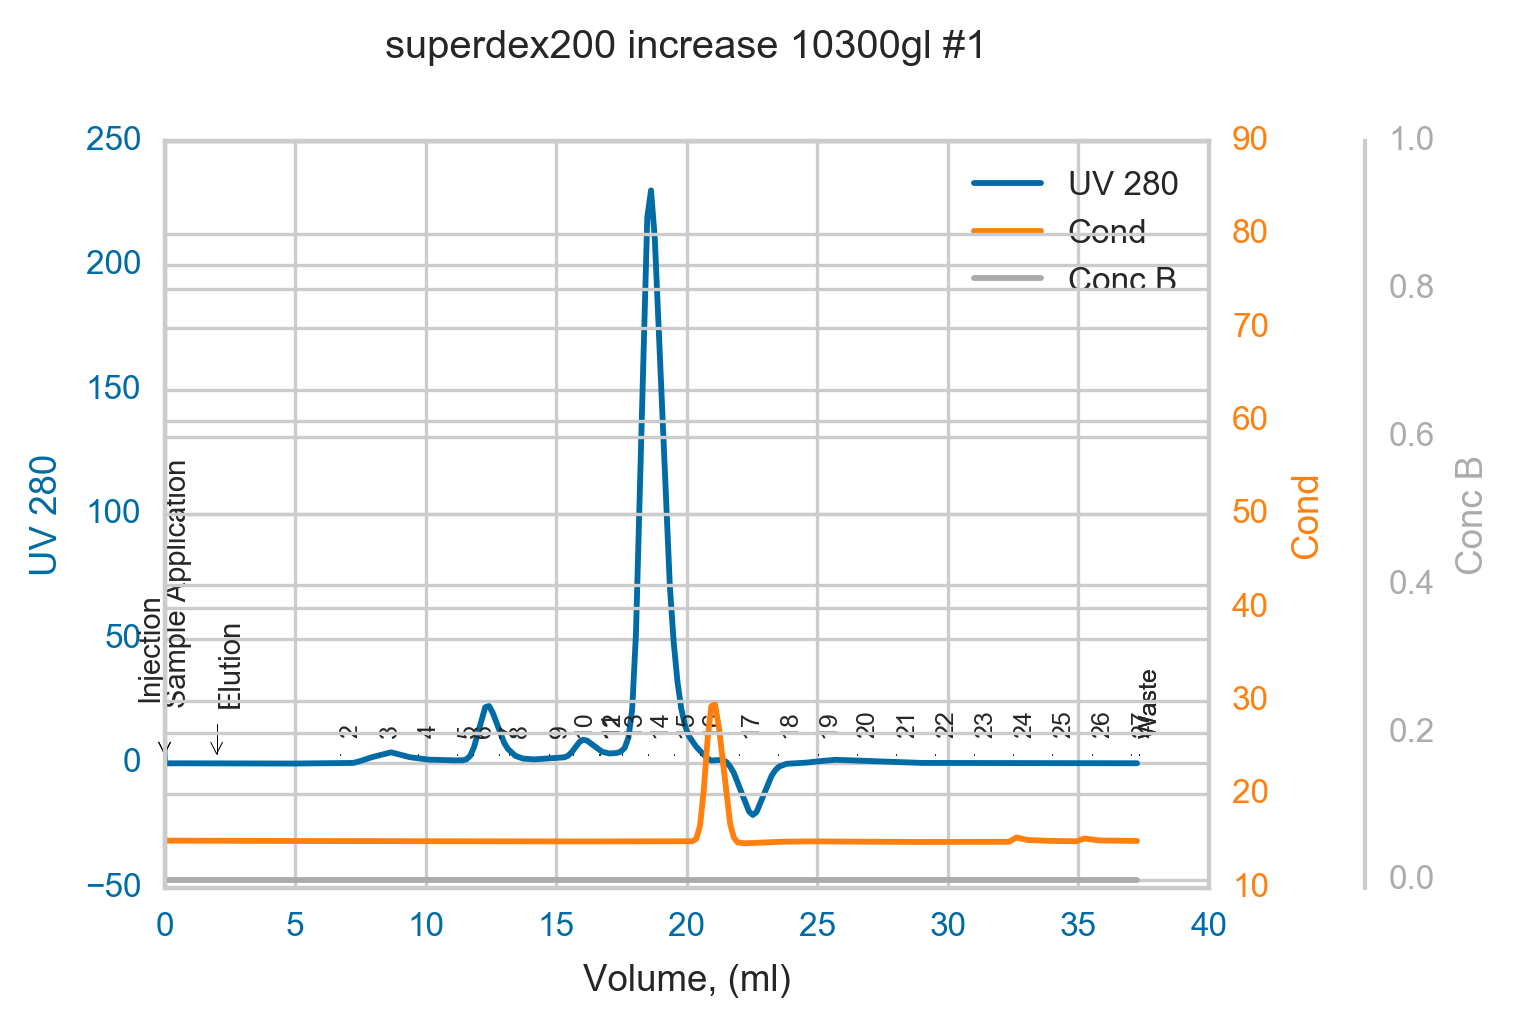

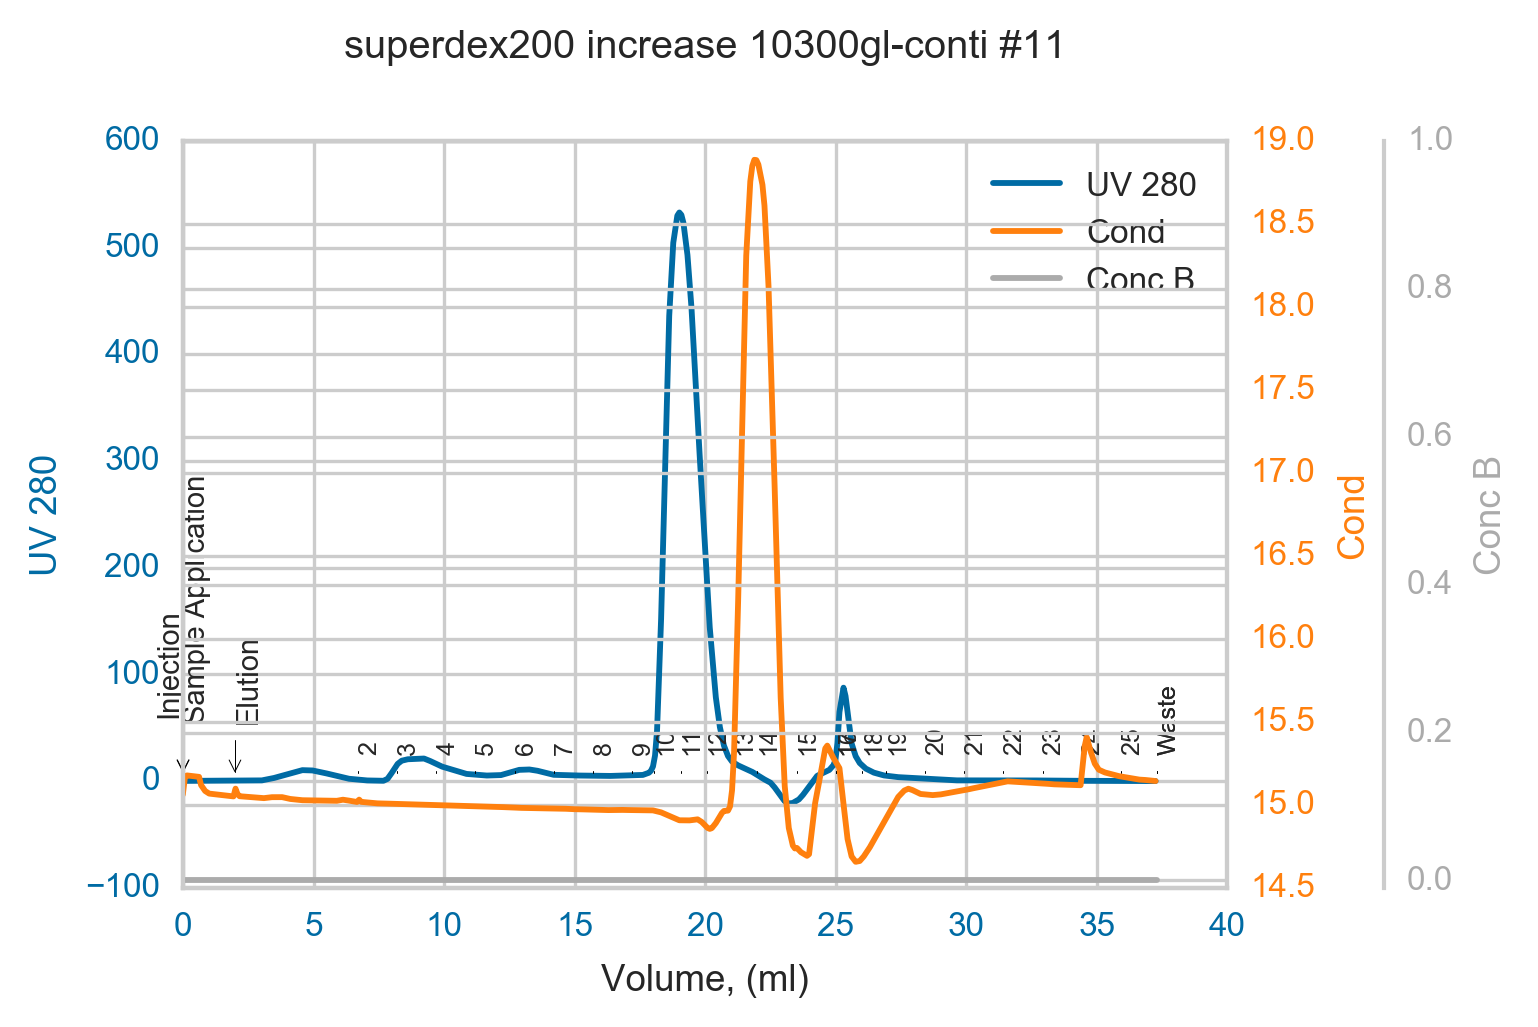

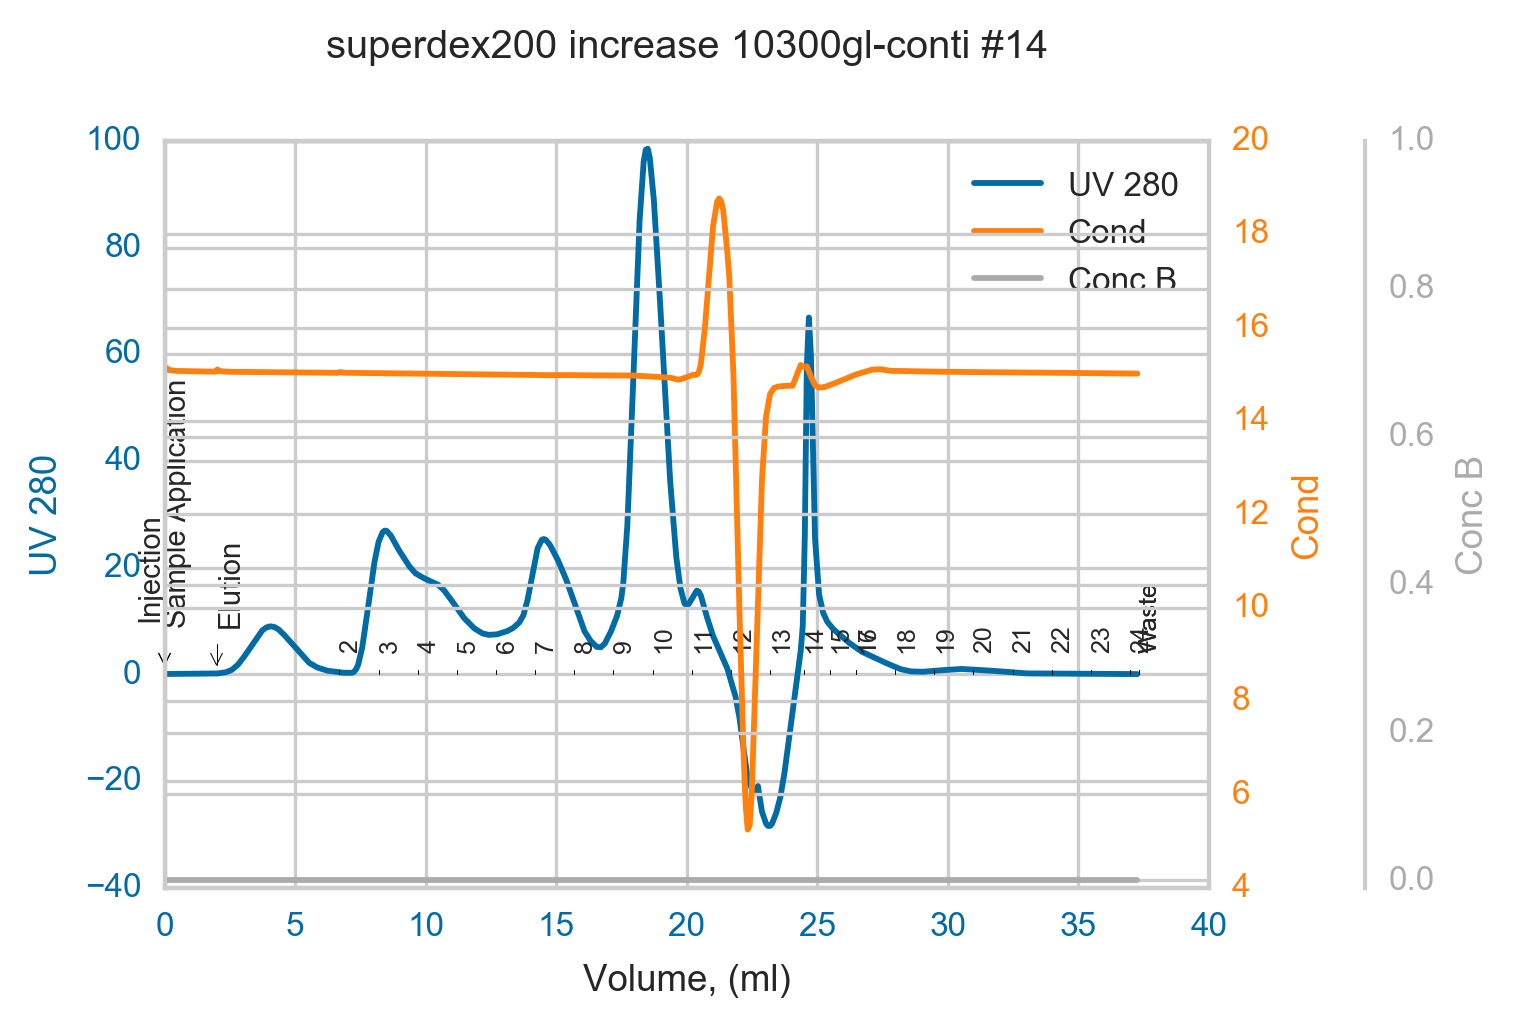

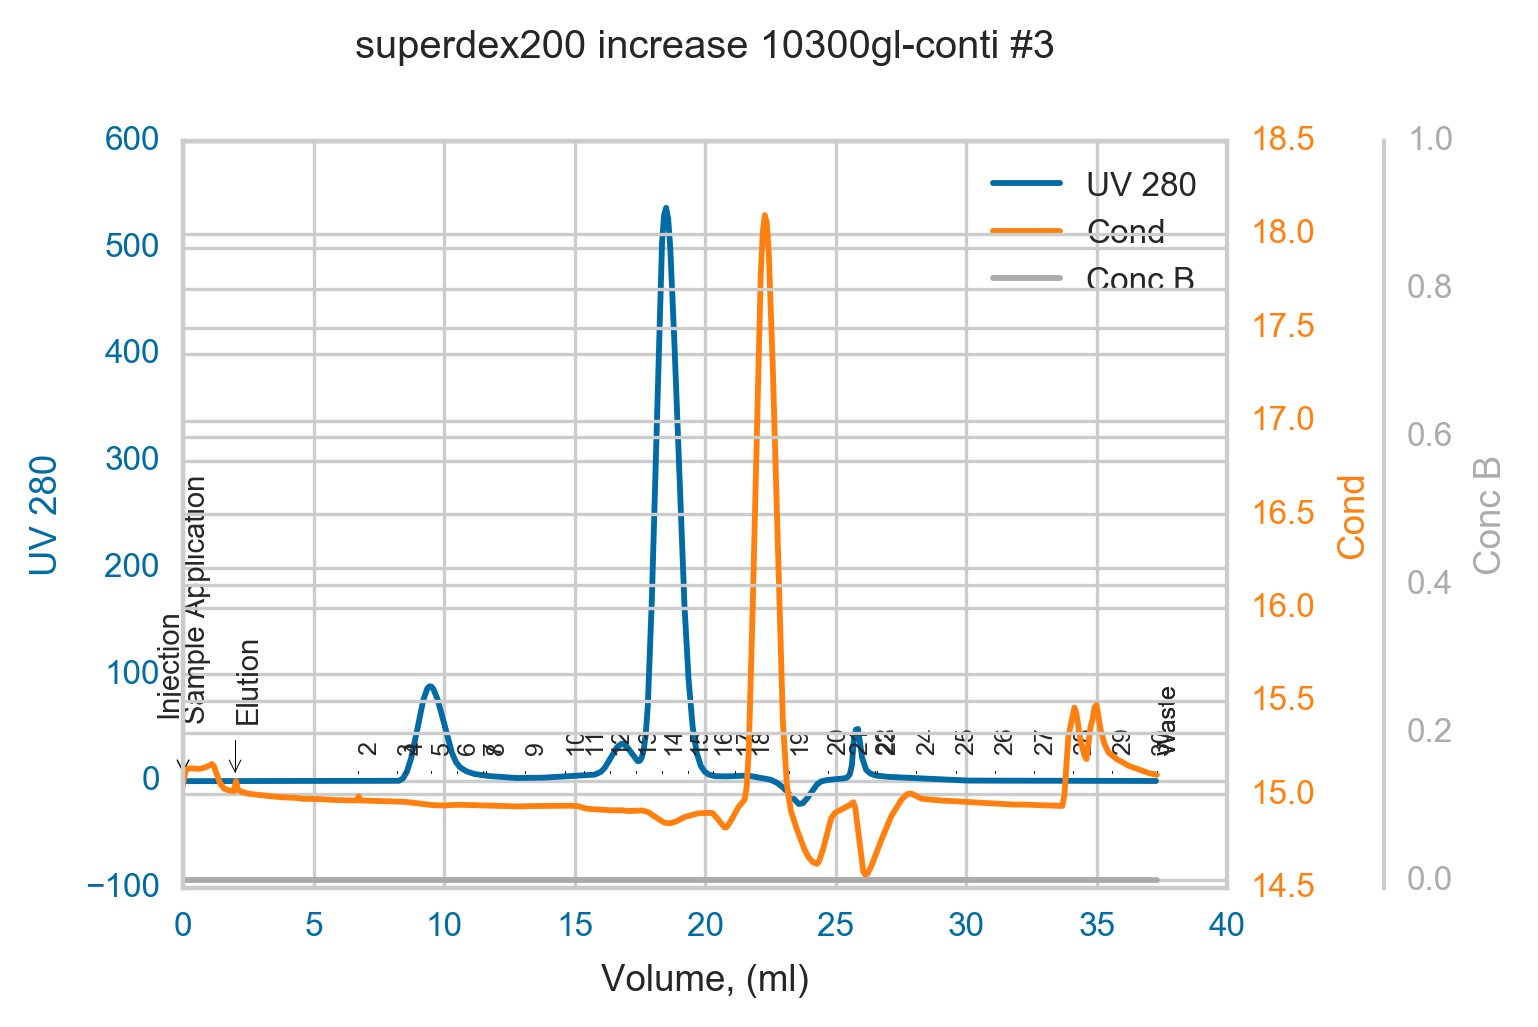

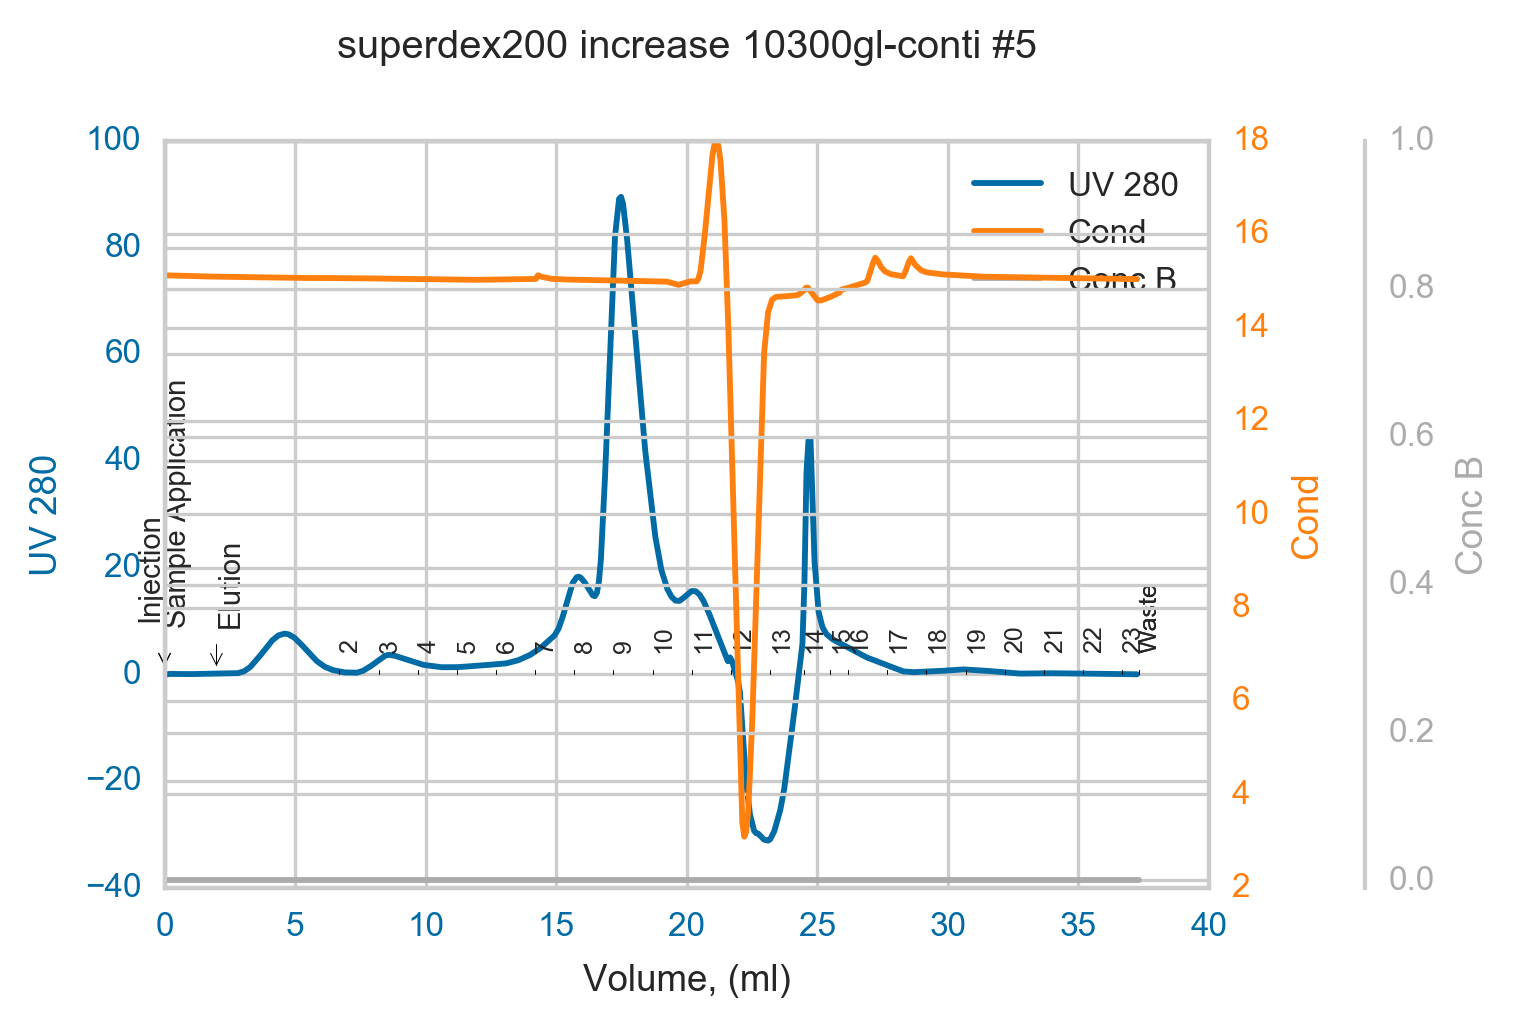

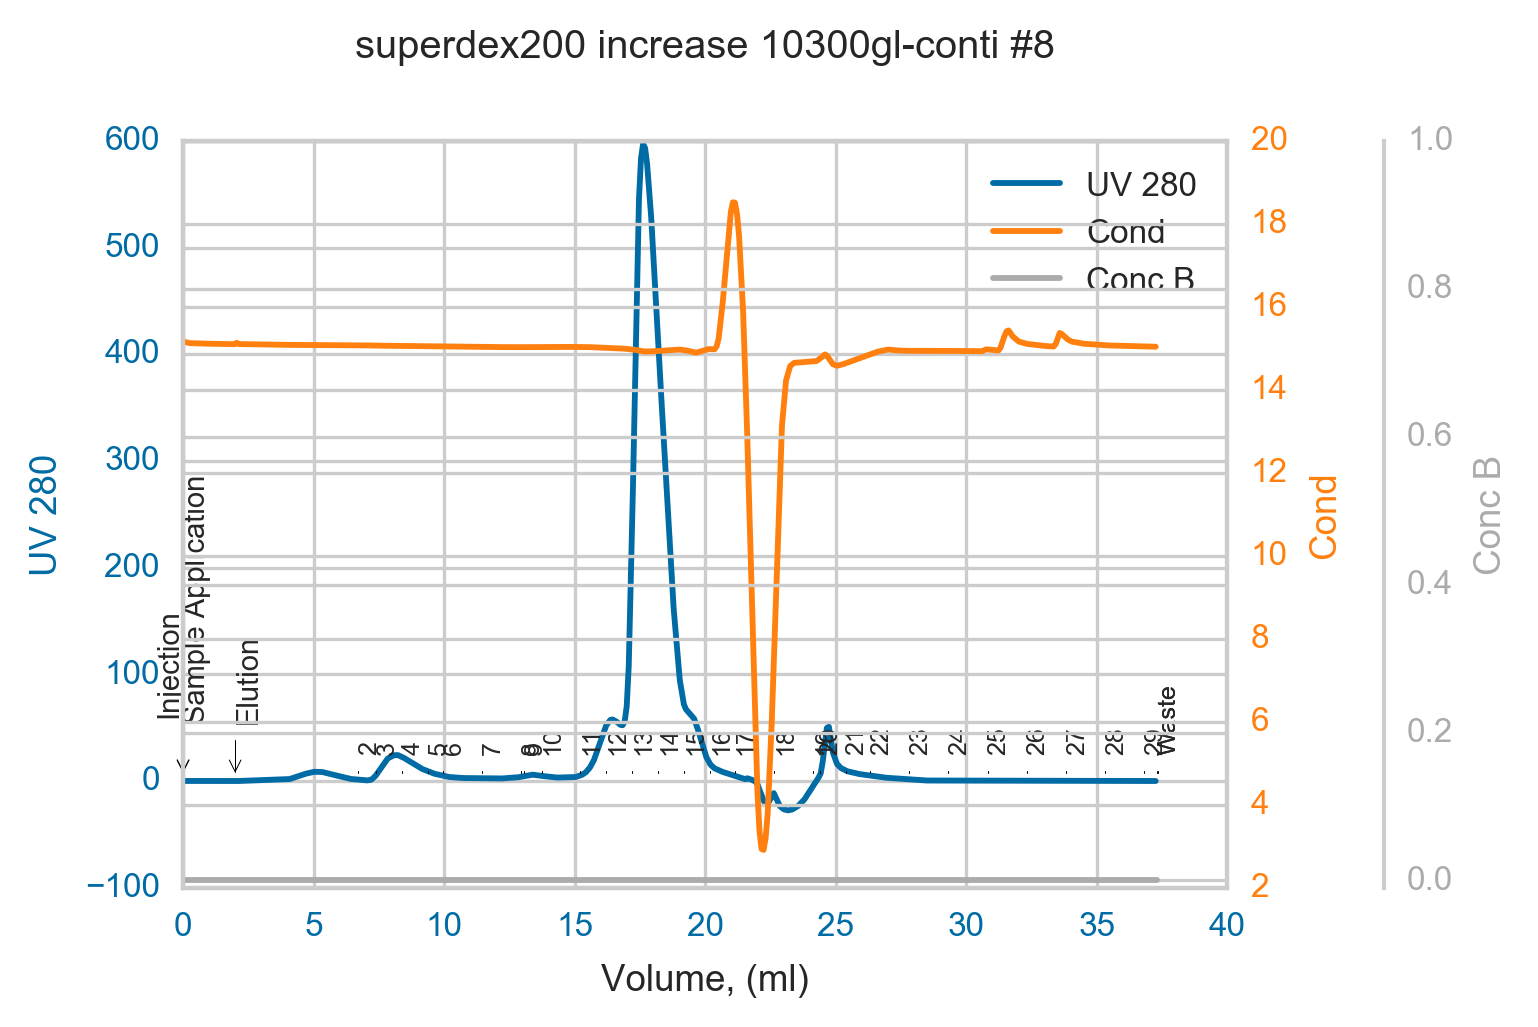

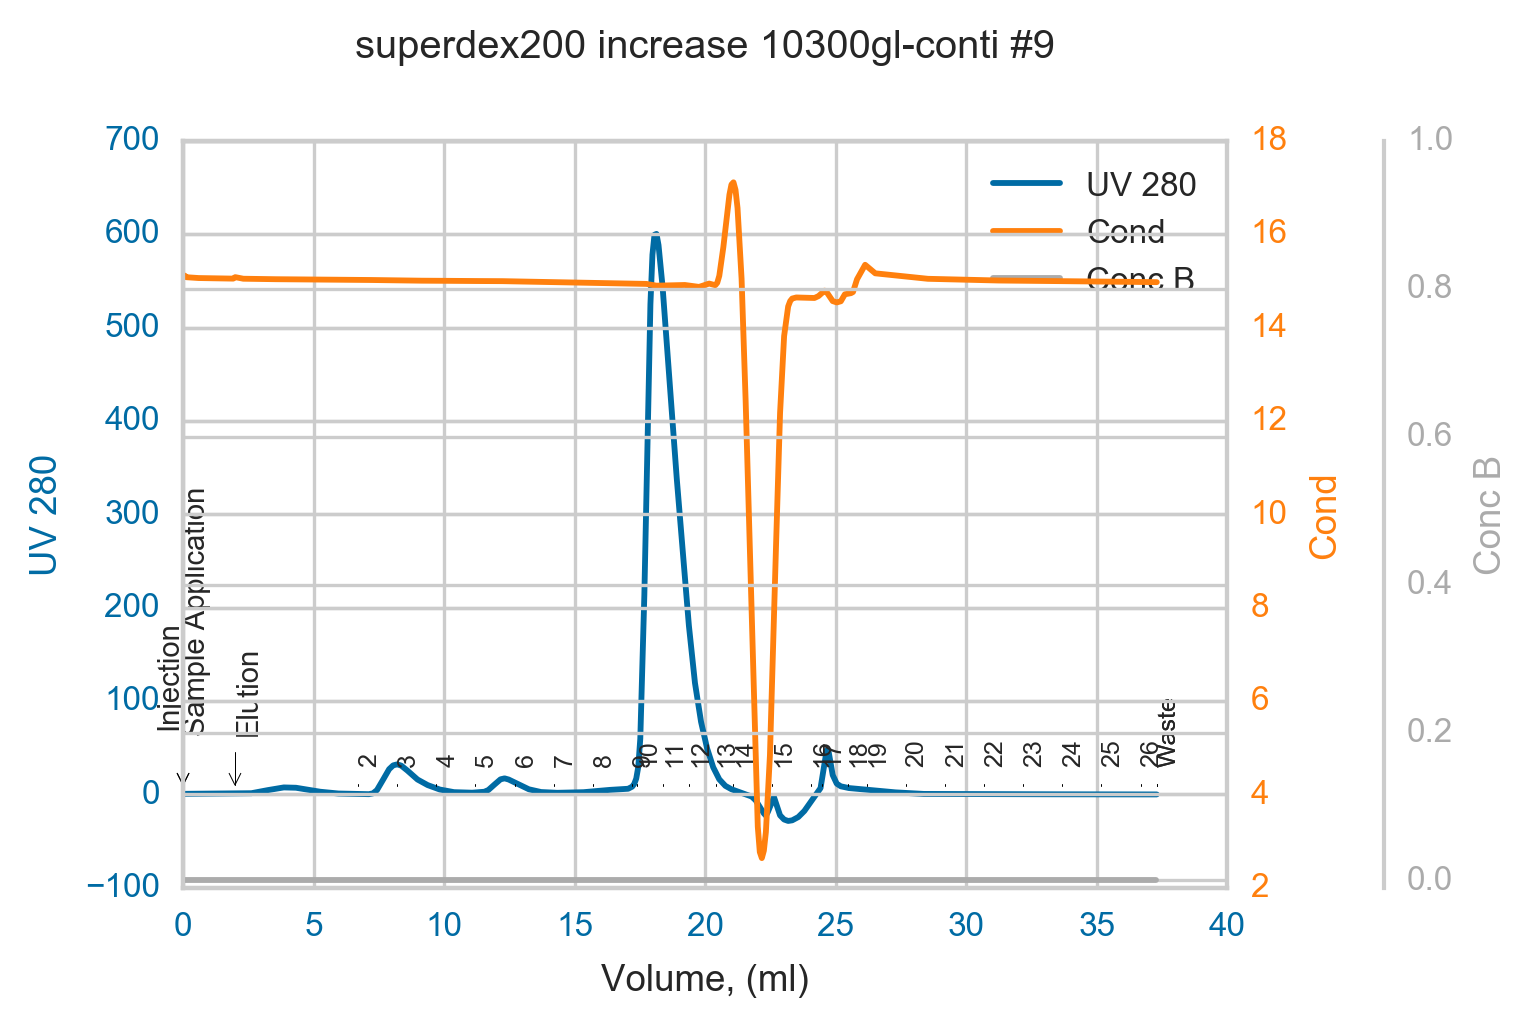

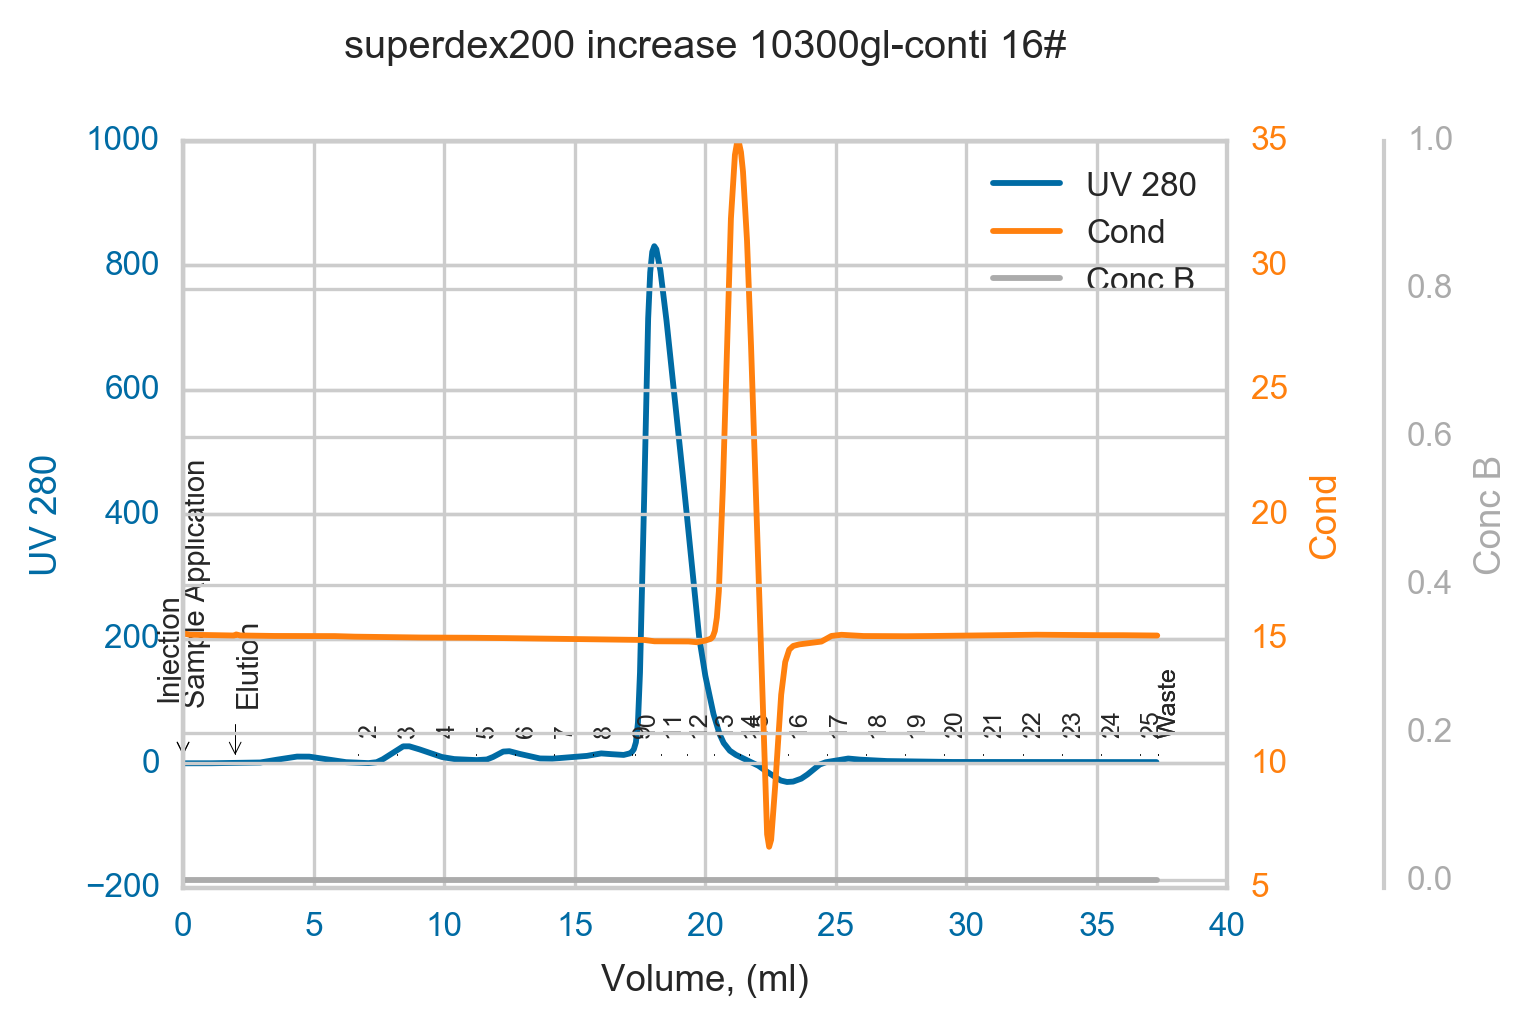

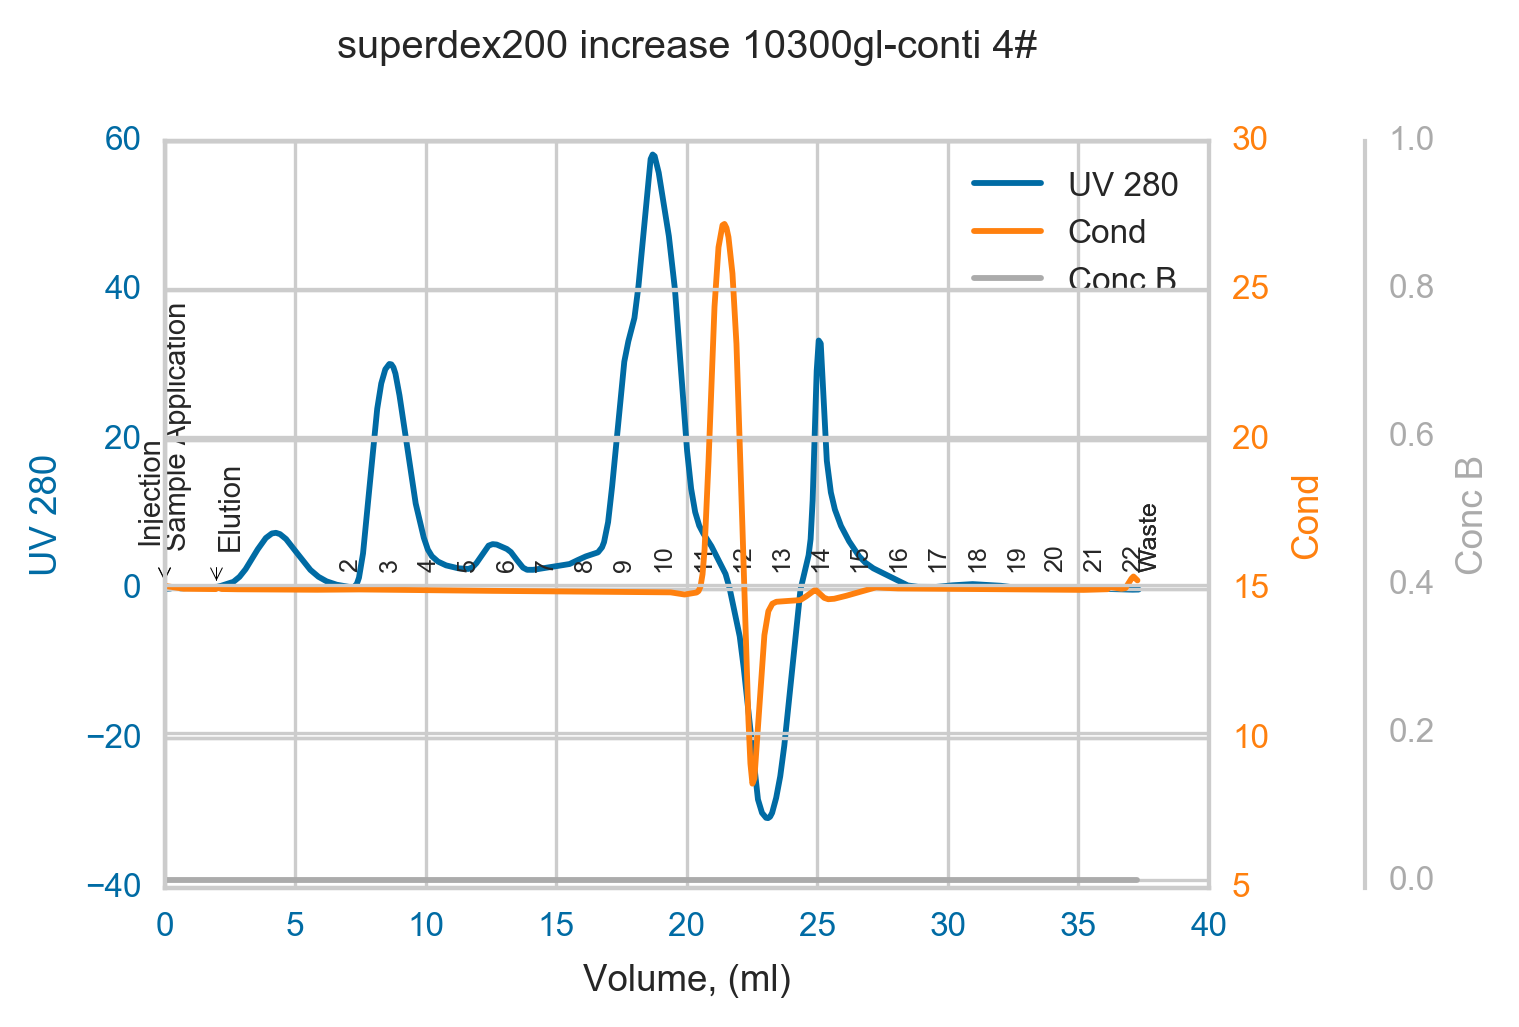

In [153]:
def Draw(test1:PlotData, style:str):
    
    plt.style.use(style)
    fig, ax = plt.subplots(figsize=Figsize,dpi=300)

    twin1 = ax.twinx()
    twin2 = ax.twinx()

    twin2.spines.right.set_position(('axes', 1.15))

    item = 'UV 1_280'
    x = test1.picked_data[item].iloc[:,0]
    y = test1.picked_data[item].iloc[:,1]
    p1, = ax.plot(x, y, 'C0', label='UV 280')
    ax.set(xlabel='Volume, (ml)', ylabel='UV 280')
    ax.yaxis.label.set_color(p1.get_color())

    if SET_Y_LIMIT:
        ax.set_ylim(bottom=Ylim[0],top=Ylim[1])
    if SET_X_LIMIT:
        ax.set_xlim(left=Xlim[0])

    ax.tick_params(colors=p1.get_color())
    item = 'Cond'
    x = test1.picked_data[item].iloc[:,0]
    y = test1.picked_data[item].iloc[:,1]
    p2, = twin1.plot(x ,y, 'C1', label='Cond')
    twin1.set(ylabel='Cond')
    twin1.yaxis.label.set_color(p2.get_color())
    twin1.tick_params(colors=p2.get_color())

    item = 'Conc B'
    x = test1.picked_data[item].iloc[:,0]
    y = test1.picked_data[item].iloc[:,1]
    p3, = twin2.plot(x ,y, 'C2', label='Conc B')
    twin2.set(ylabel='Conc B', ylim=(-0.01,1))
    twin2.yaxis.label.set_color(p3.get_color())
    twin2.tick_params(colors=p3.get_color())

    tag = 'Injection'
    for pos in test1.picked_data[tag].iloc[:,0]:
        ax.annotate('Injection',
                    xy=(float(pos),0),
                    xytext=(float(pos),max(ax.get_ylim())/10),
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="angle,angleA=0,angleB=90,rad=0",
                                    ),
                    horizontalalignment='right', 
                    verticalalignment='bottom',
                    rotation = 90,
                    size = 7,
                    )

    log = 'Run Log'
    for i in test1.picked_data['Run Log'].itertuples():
        ax.annotate(i[2],
                    xy=(float(i[1]),0),
                    xytext=(float(i[1]),max(ax.get_ylim())/10),
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="angle,angleA=0,angleB=90,rad=0",
                                    ),
                    rotation=90,
                    size = 7,
                    )

    fr = 'Fraction'
    for i in test1.picked_data[fr].itertuples():
        ax.annotate(i[2],
                    xy=(float(i[1]),0),
                    xytext=(float(i[1]),max(ax.get_ylim())/20),
                    arrowprops=dict(arrowstyle='-',
                                    connectionstyle='angle, angleA=0, angleB=90, rad=0',
                                    ),
                    rotation=90,
                    size=6
        )

    ax.legend(handles=[p1, p2, p3])
    plt.title(test1.title, pad=20)
    

    plt.savefig(test1.title+'.svg',
                format='svg',
                transparent=True,
                bbox_inches='tight',
                # pad_inches=2,
                )
    plt.show()

# for test in results:
#     for style in plt.style.available:
#         print(style)
#         Draw(PlotData(test), style)
for test in results:
    Draw(PlotData(test), 'seaborn-v0_8-paper')

In [154]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']